In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd

In [2]:
df_train_plus = pd.read_csv("data/train_set_3103.txt",names=['labels','sentences'],sep='\t')
df_test = pd.read_csv("data/annotated_test.txt", sep=';',names=['labels','sentences'])
print(df_train_plus.shape,df_test.shape)
df_test.head()

(11880, 2) (200, 2)


,labels,sentences
0,2,The role of credit scores in lending decisions...
1,6,The impact of overpopulation on the environmen...
2,8,The importance of the scientific method in con...
3,2,The startup accelerator provides funding and m...
4,10,"The benefits of biomimicry are many, including..."


In [3]:
def most_common_element(lst):
    counts = {}
    for element in lst:
        if element in counts:
            counts[element] += 1
        else:
            counts[element] = 1
    max_count = max(counts.values())
    most_common_elements = [key for key, value in counts.items() if value == max_count]

    most_common_element = None
    for element in lst:
        if element in most_common_elements:
            most_common_element = element
            break
    
    return most_common_element

In [217]:
df_test.labels.value_counts()
# TODO maybe rebalance the testset?

labels
6     32
1     26
2     19
7     18
9     18
10    15
5     15
11    14
8     13
4     11
3     10
0      9
Name: count, dtype: int64

### tf-idf improved

In [ ]:
# knn approaches are not adding a lot of because the data is not diverse enough

In [32]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_train_plus['sentences'])

In [33]:
query_vec = vectorizer.transform(df_test.loc[:,"sentences"])
results = cosine_similarity(X,query_vec).transpose()

In [34]:
highest_indices = np.argsort(results)[:,-3:]

In [35]:
result = []
for i in range(len(highest_indices)):
    highest_indices[i] = df_train_plus.loc[highest_indices[i],'labels']
    result.append(most_common_element(highest_indices[i]))

In [36]:
(result==df_test.loc[:,"labels"]).value_counts()

labels
False    151
True      49
Name: count, dtype: int64

In [37]:
pd.Series(result).value_counts()

0     42
5     34
1     31
2     18
7     13
11    12
6     11
10    10
3      9
4      8
8      6
9      6
Name: count, dtype: int64

In [38]:
report = classification_report(df_test.loc[:,"labels"],pd.Series(result))
print(report)

              precision    recall  f1-score   support

           0       0.02      0.11      0.04         9
           1       0.42      0.50      0.46        26
           2       0.22      0.21      0.22        19
           3       0.00      0.00      0.00        10
           4       0.12      0.09      0.11        11
           5       0.24      0.53      0.33        15
           6       0.45      0.16      0.23        32
           7       0.38      0.28      0.32        18
           8       0.33      0.15      0.21        13
           9       0.67      0.22      0.33        18
          10       0.30      0.20      0.24        15
          11       0.25      0.21      0.23        14

    accuracy                           0.24       200
   macro avg       0.28      0.22      0.23       200
weighted avg       0.33      0.24      0.26       200



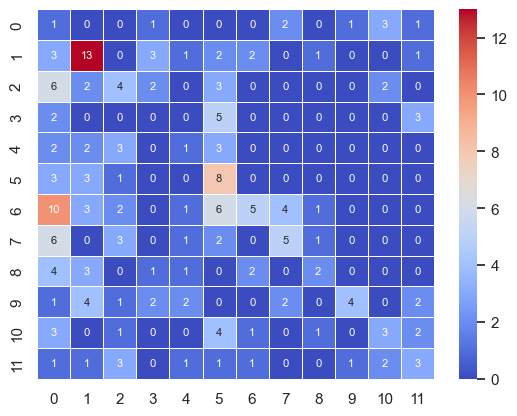

In [39]:
cm = confusion_matrix(df_test.loc[:,"labels"],pd.Series(result))
df_cm = pd.DataFrame(cm, index=list(range(12)), columns=list(range(12)))

sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidth=0.5)
plt.show()

### Concat tf-idf

In [40]:
grouped_sentences = df_train_plus.groupby('labels')['sentences'].apply(lambda x: ' '.join(x)).reset_index()

In [41]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(grouped_sentences['sentences'])

In [42]:
query_vec = vectorizer.transform(df_test.loc[:,"sentences"])
results = cosine_similarity(X,query_vec).transpose()
highest_indices = np.argsort(results)[:,-1:]

In [43]:
(grouped_sentences.loc[highest_indices.flatten(),'labels'].reset_index(drop=True)==df_test.loc[:,"labels"]).value_counts()

labels
False    121
True      79
Name: count, dtype: int64

In [44]:
grouped_sentences.loc[highest_indices.flatten(),'labels'].reset_index(drop=True).value_counts()

labels
11    68
1     32
5     27
0     22
7     21
6     11
3      8
10     5
2      4
4      1
9      1
Name: count, dtype: int64

In [48]:
report = classification_report(df_test.loc[:,"labels"],grouped_sentences.loc[highest_indices.flatten(),'labels'].reset_index(drop=True))
print(report)

              precision    recall  f1-score   support

           0       0.23      0.56      0.32         9
           1       0.56      0.69      0.62        26
           2       1.00      0.21      0.35        19
           3       0.12      0.10      0.11        10
           4       0.00      0.00      0.00        11
           5       0.52      0.93      0.67        15
           6       0.45      0.16      0.23        32
           7       0.86      1.00      0.92        18
           8       0.00      0.00      0.00        13
           9       1.00      0.06      0.11        18
          10       0.60      0.20      0.30        15
          11       0.15      0.71      0.24        14

    accuracy                           0.40       200
   macro avg       0.46      0.38      0.32       200
weighted avg       0.52      0.40      0.35       200



c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

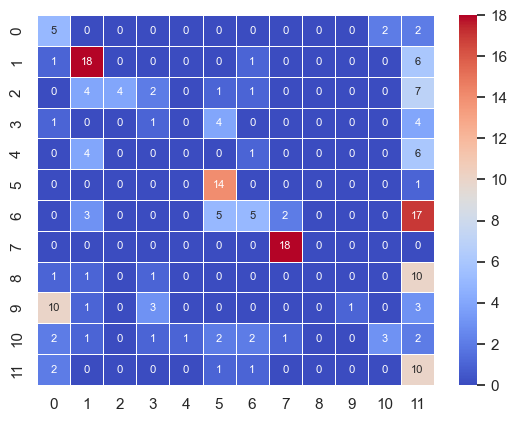

In [49]:
cm = confusion_matrix(df_test.loc[:,"labels"],grouped_sentences.loc[highest_indices.flatten(),'labels'].reset_index(drop=True))
df_cm = pd.DataFrame(cm, index=list(range(12)), columns=list(range(12)))

sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidth=0.5)
plt.show()

### Embedding

In [54]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [55]:
embeddings_test = model.encode(list(df_test["sentences"]))
embedding_train = model.encode(list(df_train_plus['sentences']))

results = cosine_similarity(embedding_train,embeddings_test).transpose()

In [56]:
highest_indices = np.argsort(results)[:,-5:]
result = []
for i in range(len(highest_indices)):
    highest_indices[i] = df_train_plus.loc[highest_indices[i],'labels']
    result.append(most_common_element(highest_indices[i]))

In [58]:
(result==df_test.labels).value_counts()

labels
True     130
False     70
Name: count, dtype: int64

In [61]:
pd.Series(result).value_counts()

6     40
1     35
7     20
5     18
0     17
3     17
2     13
10    10
11    10
8      9
9      7
4      4
Name: count, dtype: int64

In [63]:
report = classification_report(df_test.loc[:,"labels"],pd.Series(result))
print(report)

              precision    recall  f1-score   support

           0       0.47      0.89      0.62         9
           1       0.51      0.69      0.59        26
           2       0.85      0.58      0.69        19
           3       0.35      0.60      0.44        10
           4       0.00      0.00      0.00        11
           5       0.72      0.87      0.79        15
           6       0.70      0.88      0.78        32
           7       0.90      1.00      0.95        18
           8       0.44      0.31      0.36        13
           9       1.00      0.39      0.56        18
          10       0.80      0.53      0.64        15
          11       0.90      0.64      0.75        14

    accuracy                           0.65       200
   macro avg       0.64      0.61      0.60       200
weighted avg       0.68      0.65      0.64       200



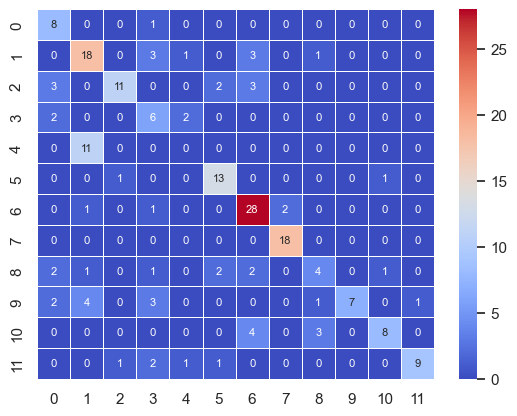

In [64]:
cm = confusion_matrix(df_test.loc[:,"labels"],pd.Series(result))
df_cm = pd.DataFrame(cm, index=list(range(12)), columns=list(range(12)))

sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidth=0.5)
plt.show()

### Concat embedding

In [ ]:
# TODO this embedding does not take enough enough token to embedded the whole text -> we need another embedfin
# and still cut the texts into smaller parts

In [65]:
grouped_sentences = df_train_plus.groupby('labels')['sentences'].apply(lambda x: ' '.join(x)).reset_index()

In [66]:
embeddings_test = model.encode(list(df_test["sentences"]))
embedding_train = model.encode(list(grouped_sentences['sentences']))

results = cosine_similarity(embedding_train,embeddings_test).transpose()

In [67]:
(grouped_sentences.loc[np.argmax(results,axis=1),"labels"].reset_index(drop=True)==df_test.labels).value_counts()

labels
True     107
False     93
Name: count, dtype: int64

In [68]:
grouped_sentences.loc[np.argmax(results,axis=1),'labels'].reset_index(drop=True).value_counts()

labels
1     31
6     28
7     27
0     20
3     20
8     19
5     15
2     10
11     9
9      8
10     7
4      6
Name: count, dtype: int64

In [69]:
report = classification_report(df_test.loc[:,"labels"],grouped_sentences.loc[np.argmax(results,axis=1),"labels"].reset_index(drop=True))
print(report)

              precision    recall  f1-score   support

           0       0.15      0.33      0.21         9
           1       0.52      0.62      0.56        26
           2       0.80      0.42      0.55        19
           3       0.30      0.60      0.40        10
           4       0.17      0.09      0.12        11
           5       0.80      0.80      0.80        15
           6       0.68      0.59      0.63        32
           7       0.67      1.00      0.80        18
           8       0.47      0.69      0.56        13
           9       0.75      0.33      0.46        18
          10       0.57      0.27      0.36        15
          11       0.56      0.36      0.43        14

    accuracy                           0.54       200
   macro avg       0.54      0.51      0.49       200
weighted avg       0.58      0.54      0.53       200



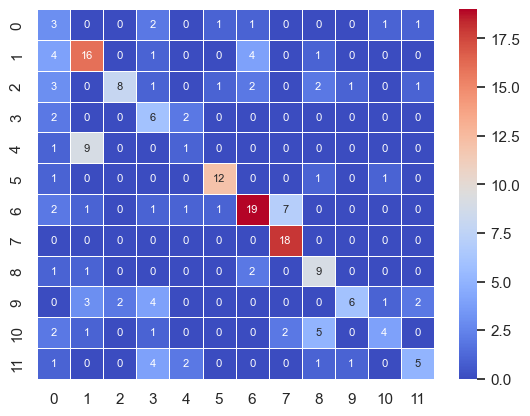

In [70]:
cm = confusion_matrix(df_test.loc[:,"labels"],grouped_sentences.loc[np.argmax(results,axis=1),"labels"].reset_index(drop=True))
df_cm = pd.DataFrame(cm, index=list(range(12)), columns=list(range(12)))

sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidth=0.5)
plt.show()